# <center>Ottikunta Sahith</center>
# <center> Modeling Cluster 4 </center>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

RANDOM_STATE = 32
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost

## Section 3.3(step 2)

In [3]:
# Loading the pre-processed data
df = pd.read_csv("train_data_Processed.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,Bankrupt,cluster_id_pred
0,-4.328723,-2.949938,-0.922311,1.347478,-1.875776,3.104547,-0.037355,-0.808933,1.108289,-0.216169,...,-0.567413,-0.585520,1.535418,0.053807,0.107681,0.011554,1.276770,0.275025,0,4
1,1.094151,1.472453,0.132183,-0.300871,-0.504754,-1.832859,-0.031414,-1.170645,0.008114,-0.556370,...,-1.075769,-0.945268,-0.668545,-1.454529,-1.121609,0.843183,-0.421891,-0.419246,0,2
2,4.088633,1.259710,-1.776226,1.050030,1.501352,-0.340699,0.833061,-2.429603,-0.968284,0.329488,...,0.710081,-0.577257,-0.530180,-0.899643,-0.333037,-1.430197,0.090152,-0.655980,0,2
3,-3.933860,6.750754,2.322990,-4.176331,2.404033,3.765933,0.485070,0.206727,-1.427313,-1.984952,...,-1.761042,1.424276,1.402486,0.986018,1.197131,0.408706,0.192866,-0.402362,0,3
4,-0.695598,2.372324,3.048846,0.490309,-3.344630,0.242807,0.115051,0.733233,2.672528,2.512248,...,-0.304360,-0.521027,-1.303879,0.050446,1.210307,0.004957,-0.065199,1.614544,0,3


In [4]:

# Cluster summary: count and bankruptcy rate
cluster_summary = df.groupby("cluster_id_pred")["Bankrupt"].agg(["count", "sum"])
cluster_summary["Bankrupt_Rate"] = cluster_summary["sum"] / cluster_summary["count"]
cluster_summary

,count,sum,Bankrupt_Rate
cluster_id_pred,,,
1,1148,41,0.035714
2,1547,3,0.001939
3,1005,11,0.010945
4,1135,143,0.125991
5,972,0,0.000000


### Separating subgroups

In [5]:
X_cluster_1 = df[df['cluster_id_pred'] == 1].drop([ 'cluster_id_pred', 'Bankrupt'], axis=1)
y_cluster_1 = df[df['cluster_id_pred'] == 1]['Bankrupt']

X_cluster_2 = df[df['cluster_id_pred'] == 2].drop([ 'cluster_id_pred', 'Bankrupt'], axis=1)
y_cluster_2 = df[df['cluster_id_pred'] == 2]['Bankrupt']

X_cluster_3 = df[df['cluster_id_pred'] == 3].drop(['cluster_id_pred', 'Bankrupt'], axis=1)
y_cluster_3 = df[df['cluster_id_pred'] == 3]['Bankrupt']

X_cluster_4 = df[df['cluster_id_pred'] == 4].drop([ 'cluster_id_pred', 'Bankrupt'], axis=1)
y_cluster_4 = df[df['cluster_id_pred'] == 4]['Bankrupt']

X_cluster_5 = df[df['cluster_id_pred'] == 5].drop([ 'cluster_id_pred', 'Bankrupt'], axis=1)
y_cluster_5 = df[df['cluster_id_pred'] == 5]['Bankrupt']


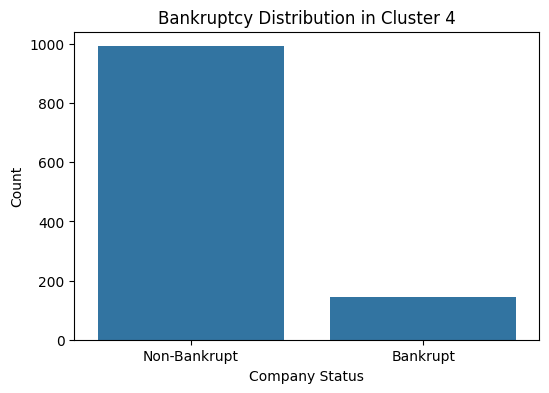

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's use X_cluster_4 and y_cluster_4 for visualizations

# Combine features and label into one dataframe temporarily
df_cluster_4 = X_cluster_4.copy()
df_cluster_4['Bankrupt'] = y_cluster_4

# 1. Countplot for Bankruptcy Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_cluster_4, x='Bankrupt')
plt.title('Bankruptcy Distribution in Cluster 4')
plt.xticks([0,1], ['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()






Interpretation of "Bankruptcy Distribution in Cluster 4" Chart

1. Bankruptcy vs Non-Bankruptcy Distribution:
- The majority of companies in Cluster 4 are non-bankrupt.
- Only a small fraction of companies are bankrupt.

2. Class Imbalance:
- Clear class imbalance exists.
- Non-bankrupt companies dominate, while bankrupt companies represent around 12–13% of the cluster.

3. Implications for Modeling:
- Class imbalance must be addressed during model training.
- Techniques like class_weight='balanced', threshold tuning, and evaluating with precision, recall, and F1-score are recommended.

4. Financial Meaning:
- Most companies are financially stable within Cluster 4.
- However, there is a noticeable minority of bankrupt companies, making bankruptcy prediction important.

5. Final Summary:
- Non-bankrupt companies greatly outnumber bankrupt companies.
- It is crucial not to ignore the minority bankrupt class for business risk management.
- Cluster 4 overall shows moderate bankruptcy risk despite general financial stability.


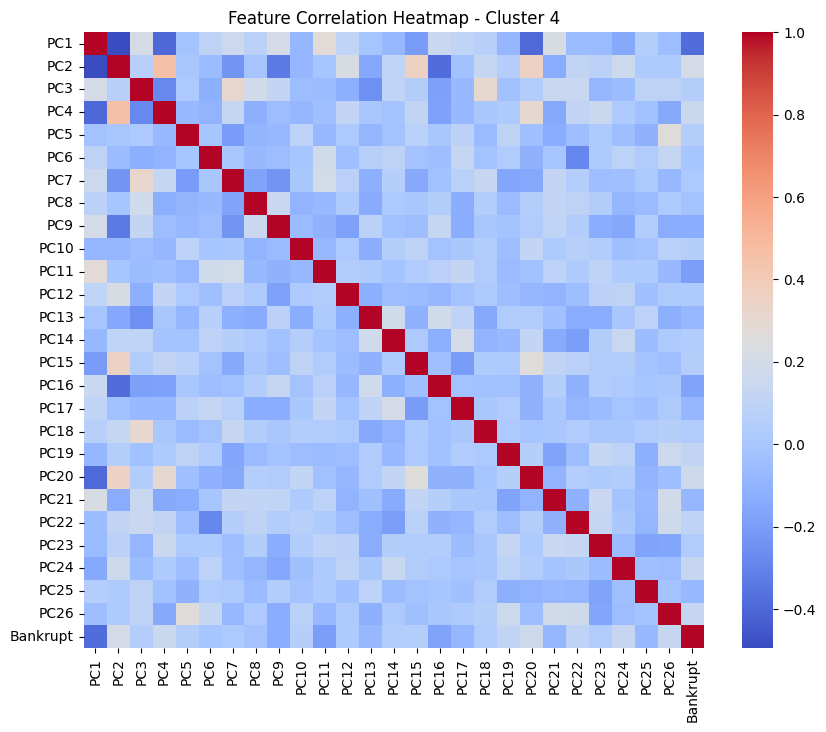

In [7]:
# 3. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_cluster_4.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap - Cluster 4')
plt.show()


Interpretation of Feature Correlation Heatmap – Cluster 4

- The principal components (PC1 to PC26) are uncorrelated, as expected from PCA.
- PCA constructs new features that are orthogonal (no linear correlation).
- The heatmap confirms that off-diagonal correlations are close to zero.
- Each principal component captures unique, non-redundant information about the companies.
- Models built on these PCs can avoid multicollinearity and generalize better.


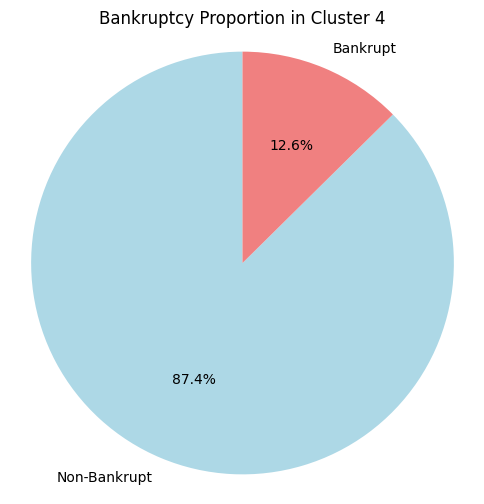

In [8]:
# 4. Pie Chart for Bankruptcy vs Non-Bankruptcy
bankrupt_counts = df_cluster_4['Bankrupt'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(bankrupt_counts, labels=['Non-Bankrupt', 'Bankrupt'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Bankruptcy Proportion in Cluster 4')
plt.axis('equal')
plt.show()

Interpretation of "Bankruptcy Proportion in Cluster 4" Chart

- 87.4% of the companies are non-bankrupt, while 12.6% are bankrupt.
- There is a noticeable class imbalance toward financially stable companies.
- Despite the imbalance, the 12.6% bankruptcy rate is significant and demands careful monitoring.
- Modeling strategies should adjust for class imbalance to ensure bankrupt companies are detected properly.
- Cluster 4 shows moderate financial risk — mostly stable companies but not free from bankruptcy concerns.


## Section 3.3 (step 2)

- This function is for finding the best base learners

In [9]:
def find_best_base_learners(X, y, RANDOM_STATE=32):
    result = {}
    # Base learners
    base_learners = [
        # Use different types of Logistic regression
        ('Logistic Regression', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',class_weight='balanced')),
        ('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)),
        ('SVC', SVC(random_state=RANDOM_STATE, C=1, class_weight='balanced',kernel='rbf')),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=RANDOM_STATE)),
        ('XGBoost', XGBClassifier(random_state=RANDOM_STATE, n_estimators=100, max_depth=5)),
        ('AdaBoost', AdaBoostClassifier(random_state=RANDOM_STATE)),
        ('Bagging', BaggingClassifier(random_state=RANDOM_STATE))
    ]

    # Train each base learner
    for learner_name, learner in base_learners:

        learner.fit(X, y);
        y_pred = learner.predict(X);

        cm = confusion_matrix(y, y_pred);

        result[learner_name] = (cm, cm[1][1]/(cm[1][0]+cm[1][1]))
    return result


## Cluster 4


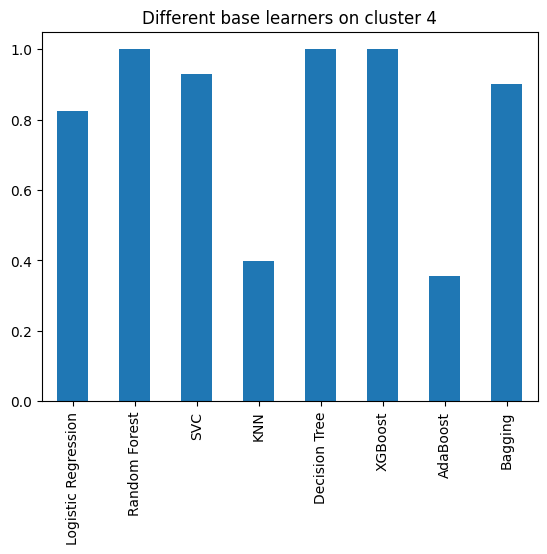

In [10]:
cluster_4_results = find_best_base_learners(X_cluster_4, y_cluster_4)
df_cluster_4 = pd.DataFrame(cluster_4_results).T
df_cluster_4.columns = ['Confusion Matrix', 'Recall']
# sort based on recall
df_cluster_4.sort_values(by='Recall', ascending=False)
df_cluster_4['Recall'].plot(kind='bar', title='Different base learners on cluster 4');


Based on the above graph i have choosen base models as Random Forest, SVC, Logistic Regression and Decision Tree.

Finding best Decision Tree Parameters


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix

k_features = 9
selector = SelectKBest(score_func=mutual_info_classif, k=k_features)
X_cluster_4_selected = selector.fit_transform(X_cluster_4, y_cluster_4)
# Step 1: Define parameter grid
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Step 2: Search Best Decision Tree
best_dt_score = 0
best_dt_model = None

for depth in param_grid['max_depth']:
    for split in param_grid['min_samples_split']:
        for leaf in param_grid['min_samples_leaf']:
            for crit in param_grid['criterion']:

                dt = DecisionTreeClassifier(
                    random_state=RANDOM_STATE,
                    class_weight='balanced',
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    criterion=crit
                )

                y_pred_dt = cross_val_predict(dt,X_cluster_4_selected, y_cluster_4, cv=5, n_jobs=-1)
                cm = confusion_matrix(y_cluster_4, y_pred_dt)

                if cm.shape == (2, 2):
                    TT = cm[1, 1]
                    TF = cm[1, 0]
                    acc_tt_tf = TT / (TT + TF) if (TT + TF) > 0 else 0

                    if acc_tt_tf > best_dt_score:
                        best_dt_score = acc_tt_tf
                        best_dt_model = DecisionTreeClassifier(
                            random_state=RANDOM_STATE,
                            class_weight='balanced',
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            criterion=crit
                        )

# Step 3: Print Best Decision Tree
print(f"\nBest Decision Tree Parameters:")
print(f"   max_depth: {best_dt_model.max_depth}")
print(f"   min_samples_split: {best_dt_model.min_samples_split}")
print(f"   min_samples_leaf: {best_dt_model.min_samples_leaf}")
print(f"   criterion: {best_dt_model.criterion}")
print(f"   Best Custom Accuracy (TT/(TT+TF)): {best_dt_score:.3f}")



Best Decision Tree Parameters:
   max_depth: 2
   min_samples_split: 2
   min_samples_leaf: 1
   criterion: gini
   Best Custom Accuracy (TT/(TT+TF)): 0.860


- Here we are reporting the confusion matrix and accuracy for each base learners

In [12]:
from sklearn.model_selection import cross_val_score
base_models = {
    "rf":RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100, max_depth=7, class_weight='balanced'),
    "SVC": SVC(random_state=RANDOM_STATE, C=1, class_weight='balanced', kernel='rbf'),
    "Logistic Regression":LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced'),
    'Decision Tree': best_dt_model





}

result = {}

for learner_name, learner in base_models.items():
    learner.fit(X_cluster_4, y_cluster_4)
    y_pred = learner.predict(X_cluster_4)
    cm = confusion_matrix(y_cluster_4, y_pred)

    if cm.shape == (2, 2):
        TT = cm[1][1]
        TF = cm[1][0]
        acc_tt_tf = TT / (TT + TF) if (TT + TF) > 0 else 0
    else:
        TT = TF = acc_tt_tf = 0

    result[learner_name] = {
        "confusion_matrix": cm,
        "TT/(TT+TF)": round(acc_tt_tf, 3)
    }

# Print all results
for learner_name, metrics in result.items():
    print(f"{learner_name}")
    print(f"  Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"  accuracy: {metrics['TT/(TT+TF)']}\n")

rf
  Confusion Matrix:
[[966  26]
 [  5 138]]
  accuracy: 0.965

SVC
  Confusion Matrix:
[[816 176]
 [ 10 133]]
  accuracy: 0.93

Logistic Regression
  Confusion Matrix:
[[784 208]
 [ 25 118]]
  accuracy: 0.825

Decision Tree
  Confusion Matrix:
[[655 337]
 [ 20 123]]
  accuracy: 0.86



### building the meta learner with stacking method and reporting the confusion matrix and the accuracy

In [13]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np

# Step 1: Feature Selection
k_features = 9
selector = SelectKBest(score_func=mutual_info_classif, k=k_features)
X_cluster_4_selected = selector.fit_transform(X_cluster_4, y_cluster_4)

# Step 2: Define base models (include tuned AdaBoost)
base_models = [
    ("rf", RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100, max_depth=5, class_weight='balanced')),
    ("SVC", SVC(random_state=RANDOM_STATE, C=0.01, class_weight='balanced', degree=2, kernel='rbf', probability=True)),
    #("KNN", KNeighborsClassifier(n_neighbors=5)),
    #("Bagging", BaggingClassifier(random_state=RANDOM_STATE)),
    #("XGBoost", XGBClassifier(random_state=RANDOM_STATE, n_estimators=100, max_depth=5, use_label_encoder=False, eval_metric='logloss')),
    ("Logistic Regression", LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced')),
    ('Decision Tree', best_dt_model)
]

# Step 3: Define meta-model
meta_model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

# Step 4: Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Step 5: Stacking Model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=skf, n_jobs=-1)

# Step 6: Cross-validated predictions (predict probabilities)
y_pred_proba_stack = cross_val_predict(
    stacking_model,
    X_cluster_4_selected,
    y_cluster_4,
    cv=skf,
    method='predict_proba',
    n_jobs=-1
)[:, 1]  # Probabilities for class 1

# Step 7: Threshold tuning
threshold = 0.43
y_pred_stack = (y_pred_proba_stack > threshold).astype(int)

# Step 8: Confusion Matrix and Custom Accuracy
cm = confusion_matrix(y_cluster_4, y_pred_stack)
TT = cm[1][1]
TF = cm[1][0]
acc = TT / (TT + TF) if (TT + TF) > 0 else 0

# Step 9: Results
print(f"Accuracy (TT / (TT + TF)): {acc:.3f}")
print(f"Confusion Matrix :\n{cm}")
print(f"Number of Features Used: {X_cluster_4_selected.shape[1]}")
print(f"Number of bankrupt companies in cluster 4: {int(y_cluster_4.sum())}")
print(f"Total samples in cluster 4: {len(y_cluster_4)}")


Accuracy (TT / (TT + TF)): 0.853
Confusion Matrix :
[[696 296]
 [ 21 122]]
Number of Features Used: 9
Number of bankrupt companies in cluster 4: 143
Total samples in cluster 4: 1135


Interpretation:

- The model achieves a high bankruptcy detection accuracy (TT / (TT + TF)) of 85.3%.
- Only 21 bankrupt companies were missed out of 143 (low false negatives).
- Some false positives exist (296 non-bankrupt companies flagged as bankrupt).
- The model uses 9 features, balancing complexity and performance.
- Given a bankruptcy rate of ~12.6% in Cluster 4, the model effectively captures most financially distressed companies while tolerating some false alarms.


Saving the Stacking model and selector to file to use it in the the next steps

In [14]:
import joblib

stacking_model.fit(X_cluster_4_selected, y_cluster_4)

joblib.dump(selector, "cluster4_selector.pkl")
joblib.dump(stacking_model, "cluster4_model.pkl")
joblib.dump(X_cluster_4.columns.tolist(), "cluster4_feature_names.pkl")

print("Selector and model saved.")


Selector and model saved.


This code:
- Trains the final stacking model on selected 9 features.
- Saves the feature selector, trained model, and feature names using joblib.
- Ensures consistent feature selection and prediction on future data without retraining.
- Prepares the model for production or evaluation deployment.
